In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Step 1: Load the provided dataset and perform initial data exploration
data = pd.read_csv("Customer.csv")
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [3]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
data.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [5]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [6]:
corr=data.corr()
corr

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


In [7]:
data=data.drop(data.columns[[0,1]],axis=1)
data


,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [8]:
data.duplicated().sum()

0

# Data Preprocessing

In [9]:
# Identify and handle missing data
missing_columns = data.columns[data.isnull().any()]
data[missing_columns] = data[missing_columns].fillna(data[missing_columns].mean())

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Location'] = label_encoder.fit_transform(data['Location'])

# Prepare data for machine learning
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

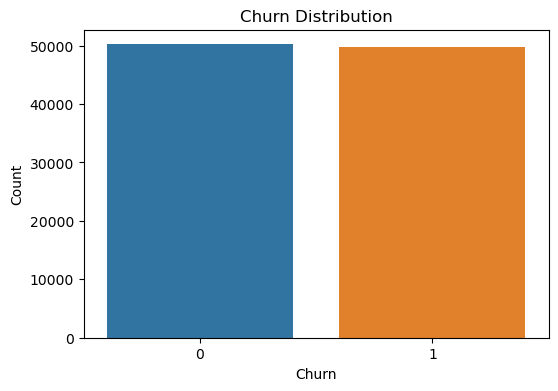

In [11]:
# Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

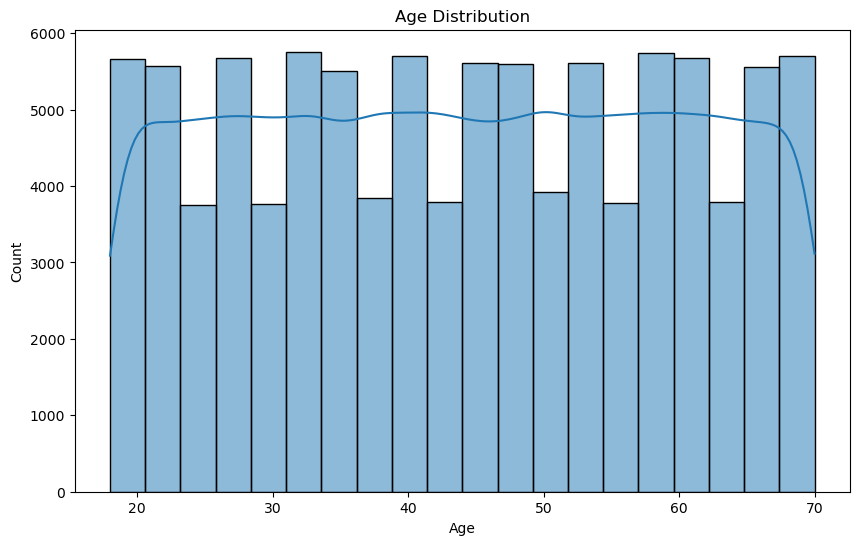

In [12]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

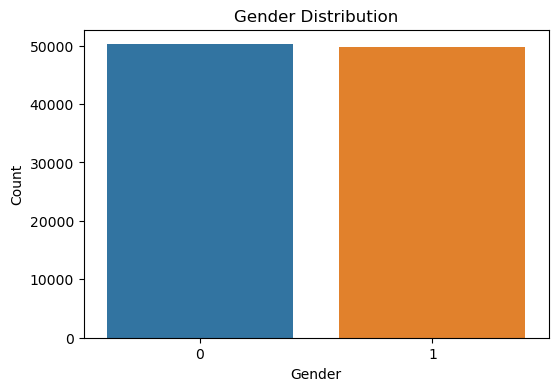

In [13]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

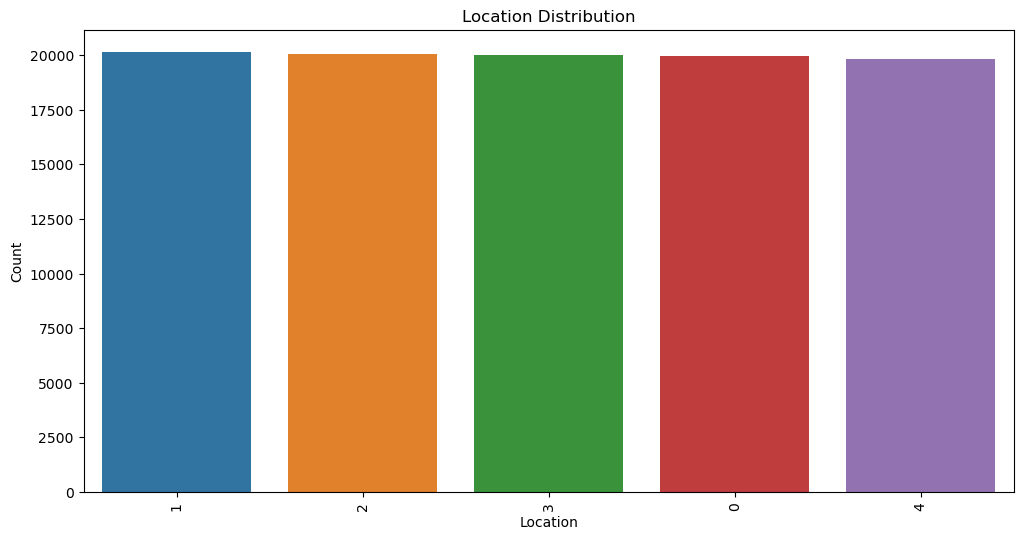

In [14]:
# Location distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Location', order=data['Location'].value_counts().index)
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

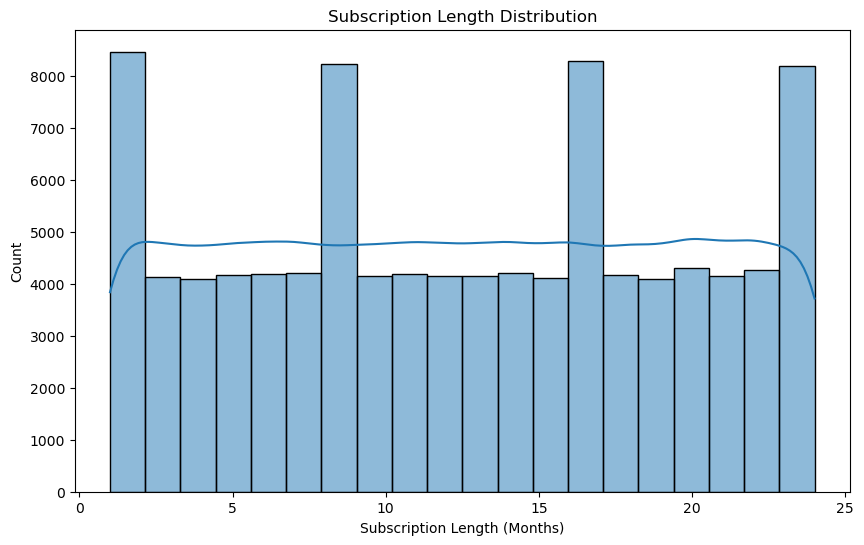

In [15]:
# Subscription Length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Subscription_Length_Months', bins=20, kde=True)
plt.title('Subscription Length Distribution')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.show()

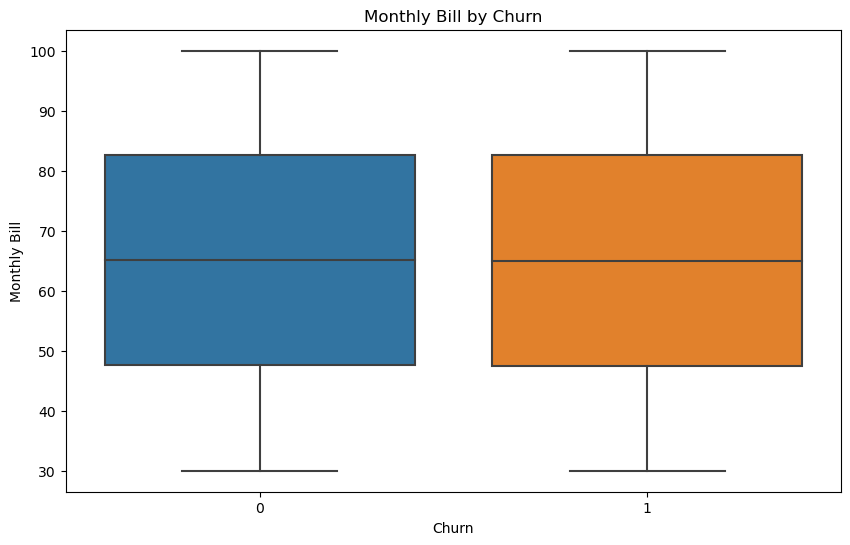

In [16]:
# Monthly Bill distribution by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Churn', y='Monthly_Bill')
plt.title('Monthly Bill by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Bill')
plt.show()

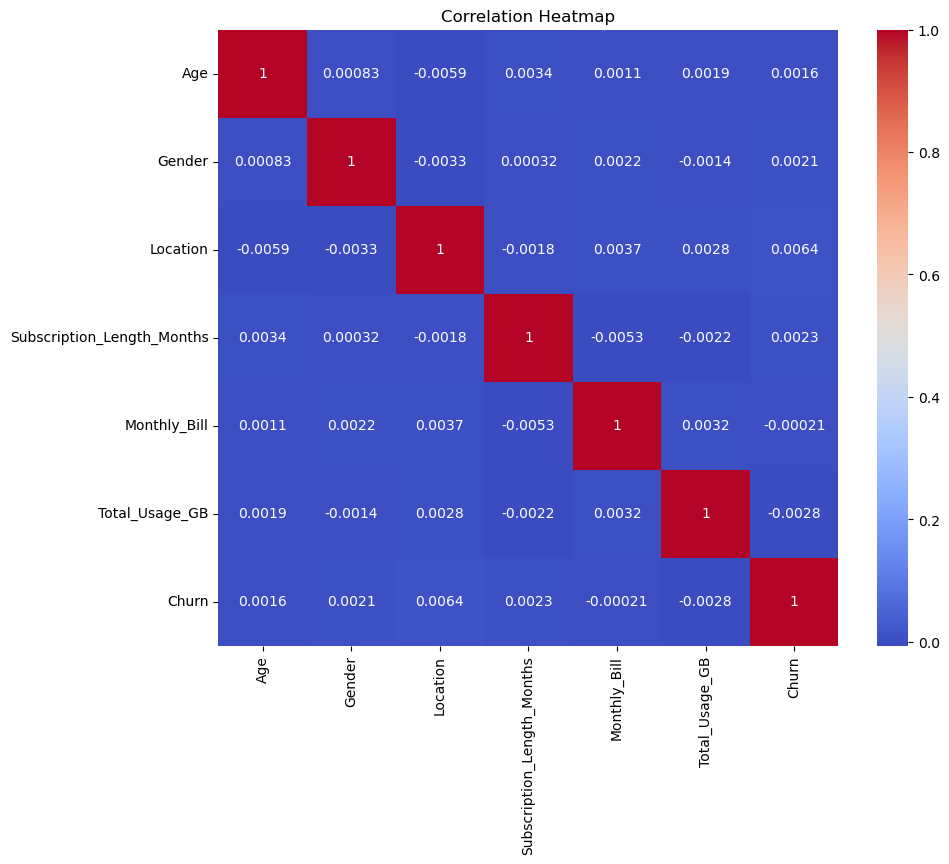

In [17]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 2: Feature Engineering

In [18]:
from sklearn.preprocessing import StandardScaler

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




# Step 3: Model Building 

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Build and train Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Build and train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)

# Validate models
y_pred_rf = random_forest_model.predict(X_test_scaled)
y_pred_lr = logistic_model.predict(X_test_scaled)

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)
accuracy_lr, precision_lr, recall_lr, f1_lr = evaluate_model(y_test, y_pred_lr)

print("Random Forest Model:")
print(f"Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1-score: {f1_rf}")

print("\nLogistic Regression Model:")
print(f"Accuracy: {accuracy_lr}, Precision: {precision_lr}, Recall: {recall_lr}, F1-score: {f1_lr}")


Random Forest Model:
Accuracy: 0.49955, Precision: 0.49533898305084745, Recall: 0.47132345529684505, F1-score: 0.4830329011931202

Logistic Regression Model:
Accuracy: 0.50225, Precision: 0.4977596204533474, Recall: 0.38070758996068943, F1-score: 0.4314352618653264


# Step 4: Model Optimization (Hyperparameter Tuning)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use a subset of your data
subset_size = 1000  # Adjust this to a reasonable subset size
X_train_subset = X_train_scaled[:subset_size]
y_train_subset = y_train[:subset_size]

# Create the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with parallel execution
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data subset
grid_search.fit(X_train_subset, y_train_subset)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

# Train the model with the best parameters on the entire training dataset
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train_scaled, y_train)

# Save the trained model to a file using pickle
with open('best_rf_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)
    
print("Model trained and saved.")


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Model trained and saved.


In [21]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use a subset of your data
subset_size = 1000  # Adjust this to a reasonable subset size
X_train_subset = X_train_scaled[:subset_size]
y_train_subset = y_train[:subset_size]

# Create the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with parallel execution
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data subset
grid_search.fit(X_train_subset, y_train_subset)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


# Step 6: Model Deployment (simulated)

In [22]:
# Save the trained model using pickle
import pickle

filename = ('model.churn')

pickle.dump(logistic_model, open(filename, 'wb'))
load_model = pickle.load(open(filename,'rb'))
load_model.score(X_test_scaled,y_test)



0.50225